In [17]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [3]:
x = np.arange(10).reshape(-1,1)
y = np.array([0,0,0,0,0,0,1,1,1,1])

In [6]:
print(x,y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]] [0 0 0 0 0 0 1 1 1 1]


In [7]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [8]:
model.fit(x,y)

LogisticRegression(random_state=0, solver='liblinear')

In [9]:
model.classes_

array([0, 1])

In [12]:
model.predict_proba(x)

array([[0.78476664, 0.21523336],
       [0.7260709 , 0.2739291 ],
       [0.65833723, 0.34166277],
       [0.58346351, 0.41653649],
       [0.50453053, 0.49546947],
       [0.42537106, 0.57462894],
       [0.34986154, 0.65013846],
       [0.28119674, 0.71880326],
       [0.22141863, 0.77858137],
       [0.17131962, 0.82868038]])

In [13]:
model.predict(x)

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [14]:
model.score(x, y)

0.9

In [15]:
confusion_mat = confusion_matrix(y, model.predict(x))

In [16]:
confusion_mat

array([[5, 1],
       [0, 4]])

#### Handwriting Recognition

In [18]:
x, y = load_digits(return_X_y=True)

In [20]:
print(x)
print(y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [22]:
scaler =StandardScaler()
x_train = scaler.fit_transform(x_train)

In [25]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [26]:
x_test = scaler.transform(x_test)

In [27]:
y_pred = model.predict(x_test)

In [28]:
model.score(x_train, y_train)

0.964509394572025

In [29]:
model.score(x_test, y_test)

0.9416666666666667

In [30]:
confusion_matrix(y_test, y_pred)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  1,  0,  1,  1],
       [ 1,  1, 33,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 28,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  2,  1,  2,  0,  0,  0,  1, 33,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  2,  1, 36]])

<Figure size 640x480 with 0 Axes>

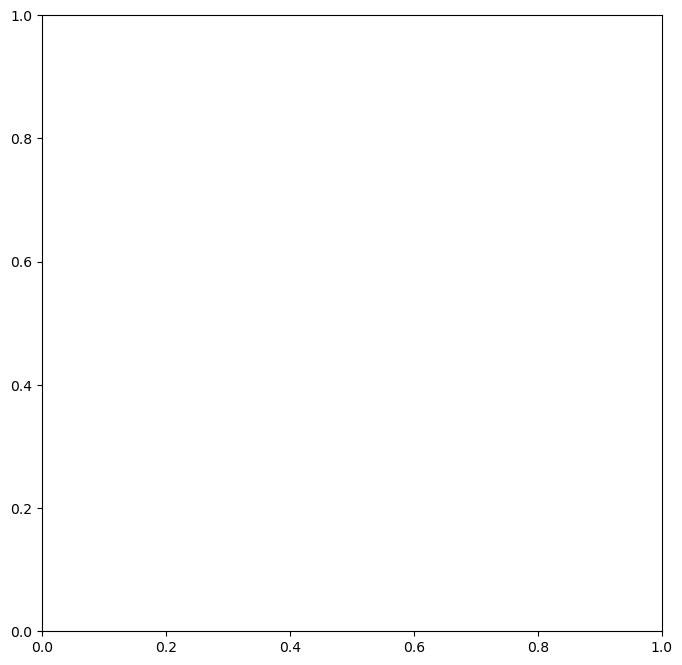

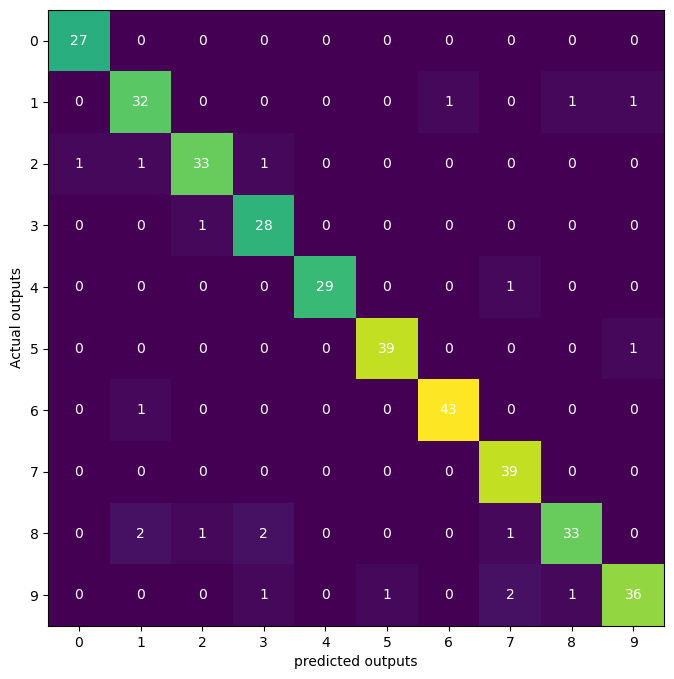

In [33]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.89      0.91      0.90        35
           2       0.94      0.92      0.93        36
           3       0.88      0.97      0.92        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       0.91      1.00      0.95        39
           8       0.94      0.85      0.89        39
           9       0.95      0.88      0.91        41

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360

